# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2022**

----

# Ejemplo con el dataset Iris

En esta notebook, ejemplificaremos el uso del método `PCA` para encontrar los componentes principales  y para reducción de dimensionalidad.

Utilizaremos el conjunto de datos didáctico [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris). Se trata de mediciones sobre la forma de distintos tipos de flores de iris y sus tipos respectivos. Será muy adecuado para visualizar los componentes principales ya que las variables son combinaciones de distintas distribuciones gaussianas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
x = iris.data
y = iris.target

In [8]:
x.shape

(150, 4)

In [9]:
y.shape

(150,)

---
El dataset iris, asi como esta importado no tiene mucho significado. Para darle sentido a los datos vamos a hacer construir un dataframe indicando los nombres de cada columna

In [10]:
columns = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'] #notar que todos los valores estan expresados en cm

data_as_dict = {col_name: x[:,col_id] for col_id, col_name in enumerate(columns)}
data_as_dict['label'] = y.astype('str')
df = pd.DataFrame(data = data_as_dict)
df.head(50)

,Sepal_length,Sepal_width,Petal_length,Petal_width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [11]:
df.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
label            object
dtype: object

<Figure size 432x288 with 0 Axes>

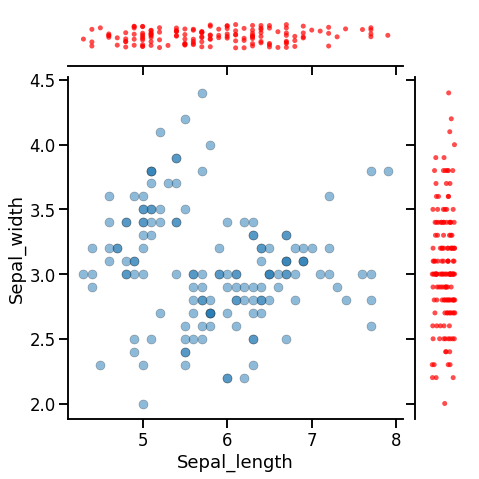

In [12]:
fig = plt.figure()
sns.set_context('talk')
# el estilo JointGrid necesariamente requiere que se defina como una variable >>> g=sns.JointGrid()
g = sns.JointGrid(data = df,
                  x = 'Sepal_length',
                  y = 'Sepal_width',
                  height = 7)

#definimos el tipo de grafico que se ubica adentro
g.plot_joint(sns.scatterplot,
             alpha=.5,
             edgecolor=".2",
             linewidth=.5) 

#definimos el tipo de grafico que se ubica por fuera
g.plot_marginals(sns.stripplot, jitter=0.2, alpha = 0.7, color = 'red')
plt.show()

In [13]:
df.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
label            object
dtype: object

<Figure size 432x288 with 0 Axes>

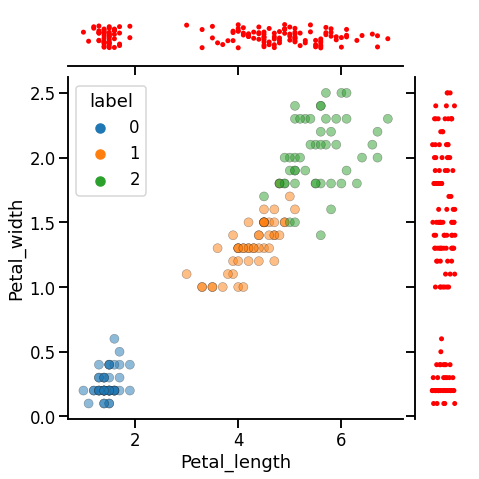

In [14]:
fig = plt.figure()
sns.set_context('talk')
# el estilo JointGrid necesariamente requiere que se defina como una variable >>> g=sns.JointGrid()
g = sns.JointGrid(data = df,
                  x = 'Petal_length',
                  y = 'Petal_width',
                  height = 7,
                  hue = 'label'
                 )

#definimos el tipo de grafico que se ubica adentro
g.plot_joint(sns.scatterplot,
             alpha=.5,
             edgecolor=".2",
             linewidth=.5            
            ) 

#definimos el tipo de grafico que se ubica por fuera
g.plot_marginals(sns.stripplot, jitter=0.2, color = 'red')
plt.show()

Si bien en la primera visualizacion no se observa un agrupamiento claro de los puntos, en esta segunda visualizacion si se ve que el grupo 0 se separa claramente de los otros dos grupo.
Es imposible hacer esto para todas las posibles combinaciones.
para eso contamos con la funcion pairplot de seaborn.

---


### Pairplot

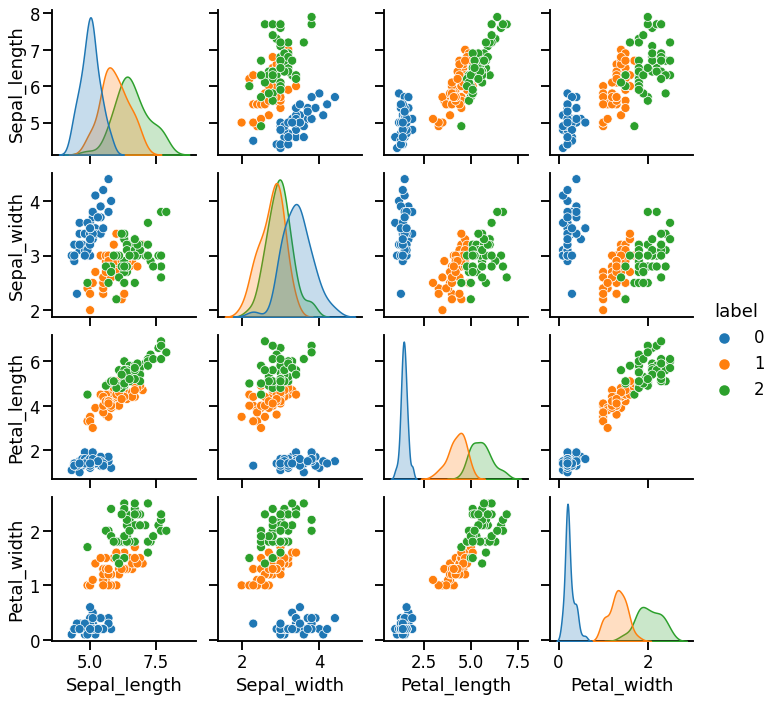

In [15]:
sns.pairplot(data = df, hue = 'label')

Con esta visualizacion podemos ver facilmente correlaciones entre variables asi como tambien agrupamientos entre algunos puntos.\
\
Lo mas indicativo de esta visulizacion es que si no utilizaramos la clasificacion por color (hue = label) diriamos que al menos hay 2 grupos de datos que se diferencian


### Reduccion de la dimensionalidad con PCA

Eliminar todas las columnas permite reducir la dimensionalidad, pero como consecuencia se pierde mucha información. Existen métodos que combinan la información de todas las columnas originales en una única dimensión. Uno de ellos es Principal Component Analysis o **PCA**.

El PCA es un método algebraico que nos permite calcular los componentes principales de una matriz. Los componentes principales son *direcciones* en el espacio de nuestros datos $R^{4}$ (más específicamente son combinaciones lineales de los datos). Estos componentes o direcciones se calculan de forma tal que:
* Son ortogonales, es decir, no están correlacionadas.
* Están ordenados de acuerdo al nivel de varianza de los datos originales que representan.

Usando estos componentes, se puede construir una proyección lineal de nuestros datos a una nueva matriz Z donde cada columna ahora está en la dirección de un componente principal. Luego, se selecciona un subconjunto de las primeras $d$ columnas para formar la matriz $Z$. Por las propiedades de los componentes principales, sabemos que hemos perdido la menor cantidad de varianza de nuestros datos.

Utilizaremos la [clase PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) implementada en la librería scikit-learn. El método `fit` computa los componentes principales de la matriz original, que luego podemos acceder a través de los atributos de la instancia `pca`.




### Ejemplo 1: Proyección de $R^2$ en $R^2$ 

Con el propósito de visualizar la transformación, utilizaremos sólo dos columnas de la matrix X.

Al entrenar la instancia de la clase `PCA`, sklearn se encarga de centrar los datos restandoles la media. Sin embargo, es recomendable también *estandarizar* o al menos *escalar* la matriz original para asegurar de que todas las variables estén en las mismas unidades y ninguna tenga un peso demasiado grande.

### Ejemplo 2: Proyección de $\mathbb{R}^4$ en $\mathbb{R}^2$ 

En el ejemplo anterior, sólo mostramos cómo los componentes principales permiten proyecta un conjunto de datos a *otras* dimensiones, pero utilizamos la misma cantidad.

Veamos ahora el resultado de calcular los componentes principales utilizando todas nuestras columnas, y luego cómo podemos proyectar esos datos de $\mathbb{R}^4$ a $\mathbb{R}^2$

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
# en este caso vamos a usar la funcion StandScaler para escalar las variables numericas

In [17]:
df.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
label            object
dtype: object

In [18]:
# la funcion de escalado y estandarizacion de sklearn se puede aplicar sobre un array, no sobre una df
# por lo tanto tenemos que convertir los datos, que estan en una df y pasarlos a un array
features = ['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
x = df.loc[:,features].values
print(type(x))
print(x)

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3

In [19]:
x = StandardScaler().fit_transform(x)

In [20]:
df_x = pd.DataFrame(data = x, columns = features)
df_x.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


En este momento contamos con una df que tiene 4 dimension o columnas, que esta escalada y estandaizada.

---

In [21]:
pca = PCA(n_components=2)

In [36]:
# este bloque nos da como resultado un array de 2 columnas (PC1 y PC2) y tantas filas como observaciones.
# los valores de cada celda corresponden al valor que tiene una determinada observacion en la componente correspondiente. 
principalComponents = pca.fit_transform(df_x) 
principalComponents.shape, principalComponents[:10] 

((150, 2),
 array([[-2.26470281,  0.4800266 ],
        [-2.08096115, -0.67413356],
        [-2.36422905, -0.34190802],
        [-2.29938422, -0.59739451],
        [-2.38984217,  0.64683538],
        [-2.07563095,  1.48917752],
        [-2.44402884,  0.0476442 ],
        [-2.23284716,  0.22314807],
        [-2.33464048, -1.11532768],
        [-2.18432817, -0.46901356]]))

In [23]:
# convertimos el array en una df

pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2'])
pca_df

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


---
El dataset que cargamos de sklearn no tiene los nombres de las especies de iris. Vamos a cargar otro dataset del que vamos a extraer esos nombres.

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df_with_species = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])
df_with_species

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
pca_df_final = pd.concat([pca_df, df_with_species[['target']]], axis = 1)
pca_df_final.head(5)

,PC1,PC2,target
0,-2.264703,0.480027,Iris-setosa
1,-2.080961,-0.674134,Iris-setosa
2,-2.364229,-0.341908,Iris-setosa
3,-2.299384,-0.597395,Iris-setosa
4,-2.389842,0.646835,Iris-setosa


In [26]:
pca_df_final.rename(columns = {'target':'Species'}, inplace=True)
pca_df_final

,PC1,PC2,Species
0,-2.264703,0.480027,Iris-setosa
1,-2.080961,-0.674134,Iris-setosa
2,-2.364229,-0.341908,Iris-setosa
3,-2.299384,-0.597395,Iris-setosa
4,-2.389842,0.646835,Iris-setosa
...,...,...,...
145,1.870503,0.386966,Iris-virginica
146,1.564580,-0.896687,Iris-virginica
147,1.521170,0.269069,Iris-virginica
148,1.372788,1.011254,Iris-virginica


### Visualizacion PCA

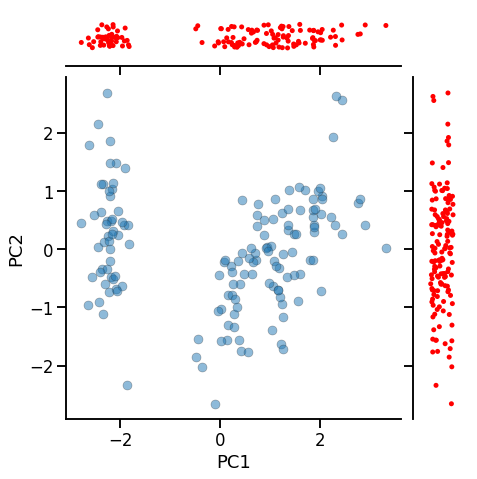

In [27]:
sns.set_context('talk')

g = sns.JointGrid(data = pca_df_final,
                 x = 'PC1',
                 y = 'PC2',
                 height = 7)

#definimos el tipo de grafico que se ubica adentro
g.plot_joint(sns.scatterplot,
             alpha=.5,
             edgecolor=".2",
             linewidth=.5            
            ) 

#definimos el tipo de grafico que se ubica por fuera
g.plot_marginals(sns.stripplot, jitter=0.2, color = 'red')


plt.show()



Visualizando los datos de esta forma vemos que pareciera haber 2 grupos de datos que se separan.

---

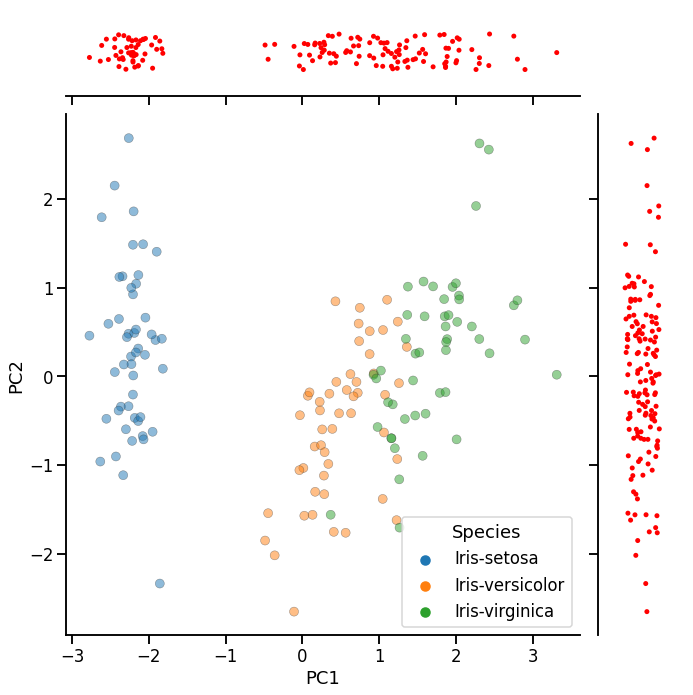

In [28]:
sns.set_context('talk')

g = sns.JointGrid(data = pca_df_final,
                 x = 'PC1',
                 y = 'PC2',
                 height = 10,
                 hue = 'Species')

#definimos el tipo de grafico que se ubica adentro
g.plot_joint(sns.scatterplot,
             alpha=.5,
             edgecolor=".2",
             linewidth=.5            
            ) 

#definimos el tipo de grafico que se ubica por fuera
g.plot_marginals(sns.stripplot, jitter=0.2, color = 'red')


plt.show()

Visualizando el resultado del PCA de esta manera vemos que la especia Iris-setosa se separa claramente del resto de las especies y las especies Iris-versicolor e Iris-virginica, si bien se se paran, no es tan clara esa separacion.

### Varianza

In [29]:
print("Principal components")
print(pca.components_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio
[0.72962445 0.22850762]


El resultado anterior muestra que el Componente principal 1 explica 72,9% de la variabilidad de los datos mientras que el componente principal 2 explica un 22,9 % de la variabilidad de los datos